# Linear Regression Using statsmodels

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

Load & Profile the Data

In [11]:
fuelData = pd.read_csv("FuelConsumptionCo2.csv")
print(fuelData.dtypes)
print(fuelData.isna().values.any())

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object
False


In [12]:
print(fuelData.info())
print(fuelData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

Visualize the data

   CYLINDERS  ENGINESIZE  CO2EMISSIONS  FUELCONSUMPTION_COMB  \
0          4         2.0           196                   8.5   
1          4         2.4           221                   9.6   
2          4         1.5           136                   5.9   
3          6         3.5           255                  11.1   
4          6         3.5           244                  10.6   

   FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB_MPG  
0                   9.9                  6.7                        33  
1                  11.2                  7.7                        29  
2                   6.0                  5.8                        48  
3                  12.7                  9.1                        25  
4                  12.1                  8.7                        27  


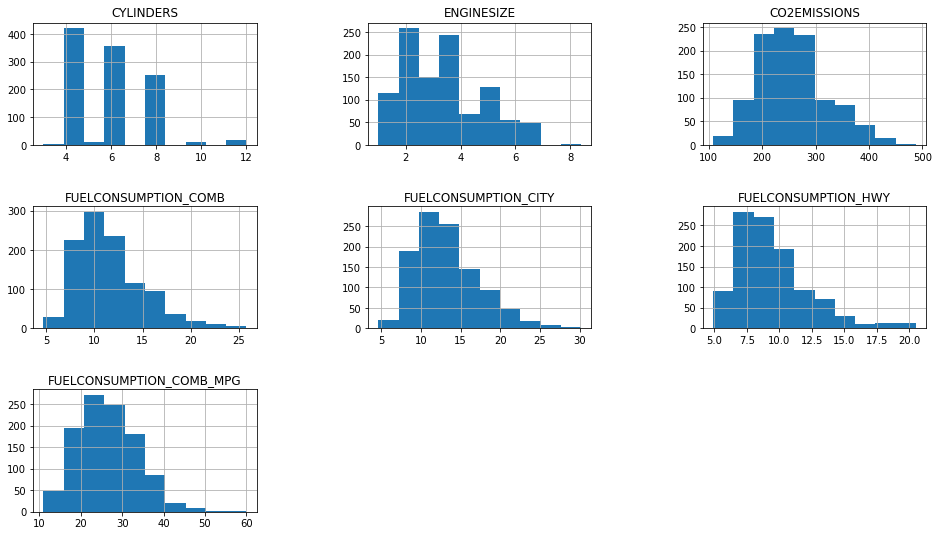

In [13]:
newFuelData = fuelData[["CYLINDERS", "ENGINESIZE", "CO2EMISSIONS", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB_MPG"]]
print(newFuelData.head())
newFuelData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualize the data (scatter)

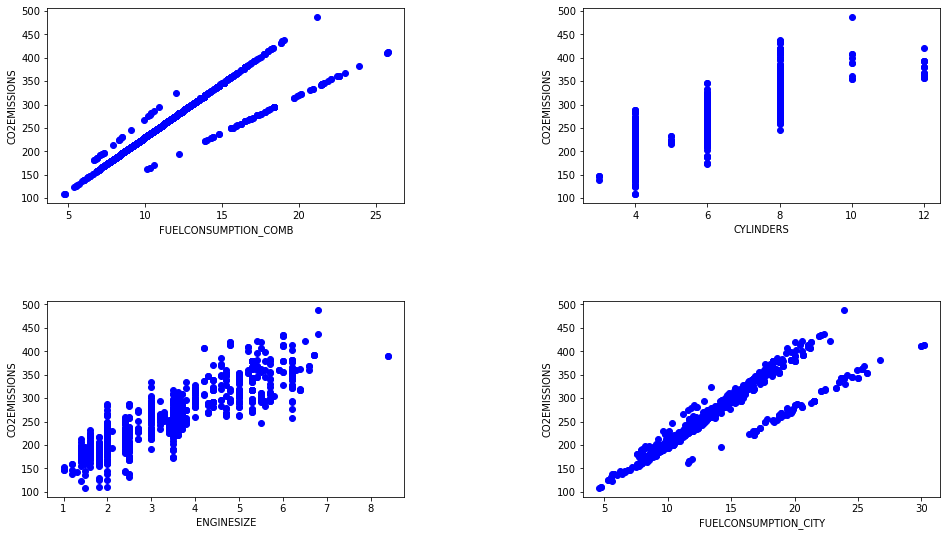

In [14]:
plt.subplot(221)
plt.scatter(newFuelData["FUELCONSUMPTION_COMB"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

plt.subplot(222)
plt.scatter(newFuelData["CYLINDERS"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

plt.subplot(223)
plt.scatter(newFuelData["ENGINESIZE"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

plt.subplot(224)
plt.scatter(newFuelData["FUELCONSUMPTION_CITY"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Let's try the regression of engine size (Searching for the relations of engine size and CO2 emissions)

In [29]:
train, test = train_test_split(newFuelData, test_size=0.2)
x = train[["ENGINESIZE"]]
y = train[["CO2EMISSIONS"]]
x = sm.add_constant(x)
models = sm.OLS(y, x)
results = models.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     2764.
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          1.70e-269
Time:                        10:48:18   Log-Likelihood:                -4135.9
No. Observations:                 853   AIC:                             8276.
Df Residuals:                     851   BIC:                             8285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.3799      2.715     46.179      0.0

Intinya, sepengetahuan saya, koefisiennya adalah 38.9390 dan intercept/slope nya adalah 125.3799. Maka, line nya seharusnya adalah y = 38.9390*x + 125.3799

Visualise the regression to the plot

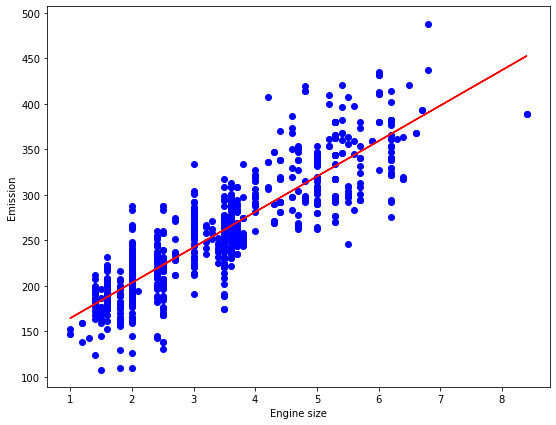

In [33]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.plot(train[["ENGINESIZE"]], results.params[1] * train[["ENGINESIZE"]] + results.params[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

In [57]:
z = test[["ENGINESIZE"]]
z = sm.add_constant(z)
print('predicted response:')
for i in range(len(test)):
    print(z.values[i], results.predict(z.values[i]))
a = test[["CO2EMISSIONS"]]
models = sm.OLS(a, z)
results = models.fit()
print(results.summary())

predicted response:
[1. 2.] [203.25790895]
[1. 2.] [203.25790895]
[1.  5.6] [343.43825085]
[1. 3.] [242.19689281]
[1.  5.7] [347.33214924]
[1.  2.4] [218.8335025]
[1.  4.3] [292.81757183]
[1.  2.4] [218.8335025]
[1. 2.] [203.25790895]
[1. 2.] [203.25790895]
[1. 3.] [242.19689281]
[1. 2.] [203.25790895]
[1.  5.3] [331.7565557]
[1. 2.] [203.25790895]
[1.  4.7] [308.39316538]
[1.  2.5] [222.72740088]
[1.  1.8] [195.47011218]
[1.  3.7] [269.45418152]
[1.  3.2] [249.98468959]
[1.  2.5] [222.72740088]
[1.  1.8] [195.47011218]
[1.  3.5] [261.66638475]
[1.  3.5] [261.66638475]
[1.  3.6] [265.56028313]
[1.  4.4] [296.71147022]
[1.  3.6] [265.56028313]
[1.  1.6] [187.68231541]
[1. 2.] [203.25790895]
[1.  3.6] [265.56028313]
[1.  1.6] [187.68231541]
[1.  4.8] [312.28706376]
[1.  5.9] [355.11994601]
[1. 5.] [320.07486054]
[1. 2.] [203.25790895]
[1.  3.6] [265.56028313]
[1.  3.6] [265.56028313]
[1.  3.5] [261.66638475]
[1.  3.8] [273.3480799]
[1. 3.] [242.19689281]
[1.  2.5] [222.72740088]
[1.  2.5

Tulisan yg '1. ' disebelah kiri bisa diabaikan saja. Yang dimaksud di sini adalah jika datanya 2.0, maka predicted valuesnya adalah 203.25790895. Jika datanya 5.6, maka predicted valuesnya adalah 343.43825085. Dan seterusnya. Dan kalau codingan saya tidak salah (saya tidak tahu saya benar apa tidak), Nilai dari R^2 (dari testCase) adalah 0.764.

Sayang sekali, saya tidak mengerti cara mencari Mean Absolute Error dan Mean Squared Error menggunakan statsmodel.